# Lesson 6 - Regression with Variable Transformation

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.formula.api as smf

# read in the mammal dataset
wd = '../datasets/'
mammals = pd.read_csv(wd+'msleep.csv')
mammals = mammals[mammals.brainwt.notnull()].copy()

# Part 1:
Explore our mammals dataset

In [5]:
mammals.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.09820,14.800


### Check 1. Distribution

#### Lets check out a scatter plot of body wieght and brain weight

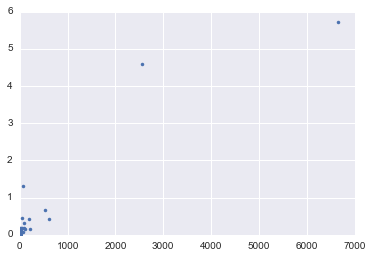

In [6]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(mammals.bodywt, mammals.brainwt, '.')
# show the plot
plt.show()

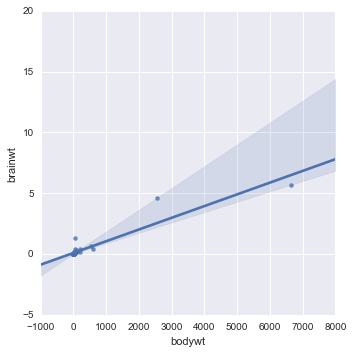

In [7]:
sns.lmplot('bodywt', 'brainwt', mammals)

### Log transformation can help here. 
Curious about the math? http://onlinestatbook.com/2/transformations/log.html



In [8]:
log_columns = ['bodywt', 'brainwt',]
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

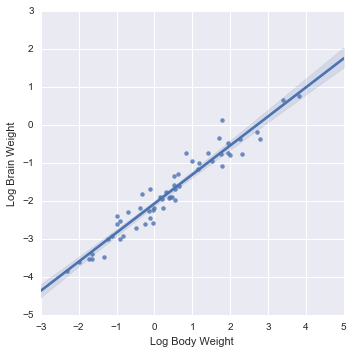

In [9]:
g = sns.lmplot('bodywt', 'brainwt', log_mammals)
g.set_axis_labels( "Log Body Weight", "Log Brain Weight")

#### Woohoo! This looks much better. 

#Part 1-  Student: 
Update and complete the code below to use lmplot and display correlations between body weight and two dependent variables: sleep_rem and awake.


##### Complete below for 2 new models: 
With body weight as the x and y set as:
1. sleep_rem 
2. awake

In [10]:
#1. add any additional variables that you would like to take the log of
log_columns = ['bodywt', 'brainwt',]  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)



#### Create the lmplots

In [11]:
g = sns.lmplot(X, Y, mammals)
g.set_axis_labels( "Body Weight", "REM")
g = sns.lmplot(X, Y, log_mammals)
g.set_axis_labels( "Log Body Weight", "Log REM ")

NameError: name 'X' is not defined

####play around with other outcomes

In [ ]:
log_columns = ['bodywt', 'brainwt', 'awake', 'sleep_rem']  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

# one other example, using brainwt and awake.
x = 'brainwt'
y = 'awake'
sns.lmplot(x, y, mammals)
sns.lmplot(x, y, log_mammals)

### Decision for Check 1. Distributrion 
Answer: 

##### We decided above that we will need a log transformation. Let's take a look at both models to compare

In [ ]:
# not transformed

X = mammals[['bodywt']]
y = mammals['brainwt']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=mammals).fit()
#print the full summary
lm.summary()



Our output tells us that:

* The relationship between bodywt and brainwt isn't random (p value approaching 0)  
* With this current model, log(brainwt) is roughly log(bodywt) * 0.0010
* The model explains, roughly, 87% of the variance of the dataset 

### Student: repeat with the log transformation

In [ ]:
# Log transformed
X =
y = 

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'

#print the full summary




### What does our output tell us?

Our output tells us that:


#### Bonus: Use Statsmodels to make the prediction

In [ ]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'X': [50]})
X_new.head()

Predict X_new

In [ ]:
#prediction

# Part 2: Multiple Regression Analysis using citi bike data 

In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called multicollinearity.

In [ ]:
wd = '../../assets/dataset/bikeshare/'
bike_data = pd.read_csv(wd+'bikeshare.csv')
bike_data.head()

##Check 2. Multicollinearity
What is Multicollinearity?

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modeling.

## Students: 
using the code from the demo create a correlation heat map comparing 'temp', 'atemp', 'casual'

In [ ]:
#cmap...


####Question: What did we find? 

#### The correlation matrix explains that:


###Demo: We can measure this effect in the coefficients:



Side note: this is a sneak peak at scikit learn

In [ ]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    # keep the model
    return algo




In [ ]:
y = bike_data['casual']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

for x in x_sets:
    print ', '.join(x)
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print

###  Intrepretation: 


### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?



In [ ]:
y = bike_data['casual']
x = bike_data[['temp', 'hum']]
get_linear_model_metrics(x, y, linear_model.LinearRegression())


## Guided Practice: Multicollinearity with dummy variables (15 mins)



There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

In [ ]:
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)

get_linear_model_metrics(weather[[1, 2, 3, 4]], y, lm)
print
# Set one weather as the reference (drop it), weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y, lm)

### Similar in Statsmodels

In [ ]:
# all dummies in the model
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

### Students: Now drop one

In [ ]:
#droping one


### Interpretation: 
This model makes more sense, because we can more easily explain the variables compared to the one we left out. 

For example, this suggests that a clear day (weathersit:1) on average brings in about 38 more riders hourly than a day with heavy snow. 

In fact, since the weather situations "degrade" in quality (1 is the nicest day, 4 is the worst), the coefficients now reflect that well. 

However at this point, there is still a lot of work to do, because weather on its own fails to explain ridership well.




### Checkout our data again

In [ ]:
bike_data.dtypes

In [ ]:
bike_data.describe()

#Part 3- Building a model to predict guest ridership
With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:
- Id categorical variables
- Create dummies (weather situation is done for you in the starter code)
- Find at least two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.

In [ ]:
#starter code (hints!)

#Dummies example: 
weather = pd.get_dummies(bike_data.weathersit)
#create new names for our new dummy variables
weather.columns = ['weather_' + str(i) for i in weather.columns]
#join those new variables back into the larger dataset
bikemodel_data = bike_data.join(weather)
print bikemodel_data.columns

#Select columns to keep. Don't forget to set a reference category for your dummies (aka drop one)
columns_to_keep = ['temp', 'weather_1', 'weather_2', 'weather_3'] #[which_variables?]

#checking for colinearity
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikemodel_data[columns_to_keep].corr()# what are we getting the correlations of?
print correlations
print sns.heatmap(correlations, cmap=cmap)





## Independent Practice: Building model to predict guest ridership 


#### Pay attention to:
* Which variables would make sense to dummy (because they are categorical, not continuous)? 
* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and guest riders  
* having a feature space (our matrix) with low multicollinearity  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?
* What features might explain ridership but aren't included in the data set? 


###You're done when:  
If your model has an r-squared above .4, this a relatively effective model for the data available. Kudos! Move on to the bonus!

In [ ]:
#your code here...

In [ ]:
#and here 

In [ ]:
#add as many cells as you need :) 

#### 1: What's the strongest predictor? 

Answer:

#### 2: How well did your model do? 

Answer:

#### 3: How can you improve it? 

Answer:

### Bonus:
    
We've completed a model that explains casual guest riders. Now it's your turn to build another model, using a different y (outcome) variable: registered riders.

Bonus 1: What's the strongest predictor? 

Bonus 2: How well did your model do? 

Bonus 3: How can you improve it? 